In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import remove_small_holes, remove_small_objects, disk, opening, closing
import glob
import pathlib

In [98]:
rpi = 'h2r4'

# Read input image and resize them
path_to_folder = '../live_bees/' + rpi + '/random_images_25/*.jpg'
folder_in = sorted(glob.glob(path_to_folder))
names = [pathlib.Path(x).stem for x in folder_in]
imgs = [cv2.imread(x) for x in folder_in]

output_folder = '../a_processed_images/thresholding/' + rpi + '/' 

In [117]:
if rpi == 'h2r1': threshold = 60 #h2r1
if rpi == 'h2r2': threshold = 100 #h2r2
if rpi == 'h2r3': threshold = 60 #h2r3
if rpi == 'h2r4': threshold = 50 #h2r4
imgs_tmp = []
for img in imgs:
    img_tmp = cv2.equalizeHist(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)) #histogram equalization
    img_tmp = cv2.GaussianBlur(img_tmp, (7, 7), 0) #blur cause it never caused any harm
    _, img_tmp = cv2.threshold(img_tmp, threshold, 255, cv2.THRESH_BINARY) #thresholding
    imgs_tmp.append(img_tmp)

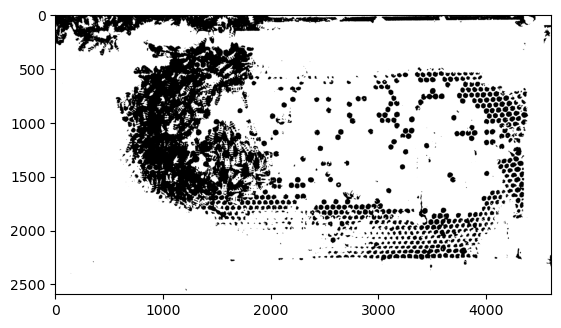

In [118]:
plt.imshow(imgs_tmp[0], cmap='gray')

In [121]:
imgs_tmp1000_oc = []
n = 0
times = []
for img_tmp, name in zip(imgs_tmp, names):
    # some morphological operations (this take lil bit of time)
    img_tmp1000 = remove_small_objects(img_tmp, min_size=1000); #remove small objects
    img_tmp1000_rem = remove_small_holes(img_tmp1000, area_threshold=1000); #remove small holes
    img_tmp1000_oc = closing(opening(img_tmp1000_rem, disk(5)), disk(5)) #open then close the mask (small disk cause takes time)
    imgs_tmp1000_oc.append(~img_tmp1000_oc)
    # to save time in the future, save the masks
    cv2.imwrite(output_folder + name + '.jpg', ~img_tmp1000_oc*255)
    n += 1
    

/var/folders/81/88qz8hc518d6msz681nh39mm0000gn/T/ipykernel_47736/1909713744.py:7: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  img_tmp1000_rem = remove_small_holes(img_tmp1000, area_threshold=1000); #remove small holes


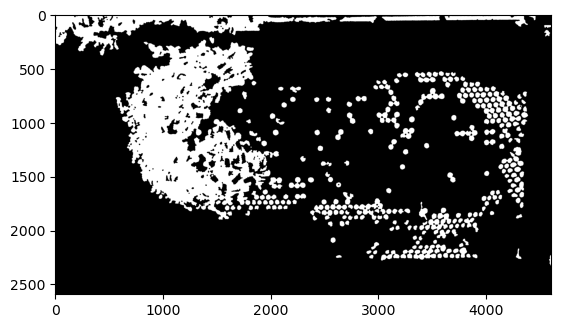

In [120]:
plt.imshow(imgs_tmp1000_oc[0], cmap='gray')